<a href="https://colab.research.google.com/github/valerichristy/EDA/blob/main/EDA_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA Student Performance by Valeri Christy - for Data Analyst Application

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('sdata.csv')

In [ ]:
data.describe()

,Num,NrSiblings,MathScore,ReadingScore,WritingScore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.113000,66.602000,69.352000,68.727000
std,288.819436,1.449943,15.469677,14.959675,15.872442
min,1.000000,0.000000,9.000000,10.000000,13.000000
25%,250.750000,1.000000,56.000000,59.000000,58.000000
50%,500.500000,2.000000,67.000000,70.000000,69.000000
75%,750.250000,3.000000,78.000000,80.250000,80.000000
max,1000.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Num             1000 non-null   int64 
 1   Gender          1000 non-null   object
 2   EthnicGroup     1000 non-null   object
 3   ParentEduc      1000 non-null   object
 4   LunchType       1000 non-null   object
 5   PracticeSport   1000 non-null   object
 6   NrSiblings      1000 non-null   int64 
 7   TransportMeans  1000 non-null   object
 8   MathScore       1000 non-null   int64 
 9   ReadingScore    1000 non-null   int64 
 10  WritingScore    1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
# addding TotalScore as the average of math, reading, and writing scores
data['TotalScore'] = (data['MathScore'] + data['ReadingScore'] + data['WritingScore']) / 3

In [ ]:
# create column Grade based on Total Score
conditions = [
    data['TotalScore'] >= 76,
    data['TotalScore'] >= 60,
    data['TotalScore'] < 60,
]

values = ['High', 'Medium', 'Low']
data['Grade'] = np.select(conditions, values)


In [ ]:
data.head()

,Num,Gender,EthnicGroup,ParentEduc,LunchType,PracticeSport,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,TotalScore,Grade
0,1,male,group B,bachelor's degree,standard,never,4,private,69,67,69,68.333333,Medium
1,2,female,group C,some college,standard,never,0,private,72,86,82,80.000000,High
2,3,male,group D,some college,standard,never,3,private,64,62,56,60.666667,Medium
3,4,male,group A,some high school,free/reduced,never,1,private,52,45,41,46.000000,Low
4,5,male,group E,master's degree,standard,never,0,school_bus,69,62,67,66.000000,Medium


In [ ]:
# delete column Num
# data.drop(columns="Num")

In [ ]:
# count of each categorical data

for column in data.columns:
  if data[column].dtype == object:
    print(f"Counts for column '{column}':")
    print(data[column].value_counts())
    print("\n")

Counts for column 'Gender':
Gender
female    511
male      489
Name: count, dtype: int64


Counts for column 'EthnicGroup':
EthnicGroup
group C    314
group D    266
group B    190
group E    158
group A     72
Name: count, dtype: int64


Counts for column 'ParentEduc':
ParentEduc
some college          247
associate's degree    219
some high school      184
high school           180
bachelor's degree      88
master's degree        82
Name: count, dtype: int64


Counts for column 'LunchType':
LunchType
standard        643
free/reduced    357
Name: count, dtype: int64


Counts for column 'PracticeSport':
PracticeSport
sometimes    503
regularly    364
never        133
Name: count, dtype: int64


Counts for column 'TransportMeans':
TransportMeans
school_bus    585
private       415
Name: count, dtype: int64


Counts for column 'Grade':
Grade
Medium    401
High      316
Low       283
Name: count, dtype: int64




In [ ]:
# TotalScore average of each categorical data

for column in data.columns:
  if data[column].dtype == object:
    print(f"Average for column '{column}':")
    print(data.groupby([column])['TotalScore'].mean())
    print("\n")

Average for column 'Gender':
Gender
female    70.882583
male      65.451943
Name: TotalScore, dtype: float64


Average for column 'EthnicGroup':
EthnicGroup
group A    64.027778
group B    66.617544
group C    66.319533
group D    69.289474
group E    74.078059
Name: TotalScore, dtype: float64


Average for column 'ParentEduc':
ParentEduc
associate's degree    70.228311
bachelor's degree     71.098485
high school           66.840741
master's degree       73.325203
some college          69.122807
some high school      62.353261
Name: TotalScore, dtype: float64


Average for column 'LunchType':
LunchType
free/reduced    61.840336
standard        71.772939
Name: TotalScore, dtype: float64


Average for column 'PracticeSport':
PracticeSport
never        65.994987
regularly    69.934066
sometimes    67.581842
Name: TotalScore, dtype: float64


Average for column 'TransportMeans':
TransportMeans
private       69.263454
school_bus    67.491738
Name: TotalScore, dtype: float64


Average for co

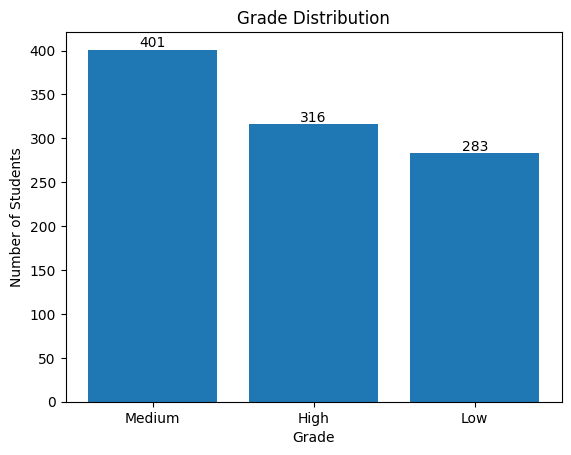

In [ ]:
# grade distribution
grade_counts = data['Grade'].value_counts()

bars = plt.bar(grade_counts.index, grade_counts.values)

# bar labels
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Grade Distribution')
plt.show()

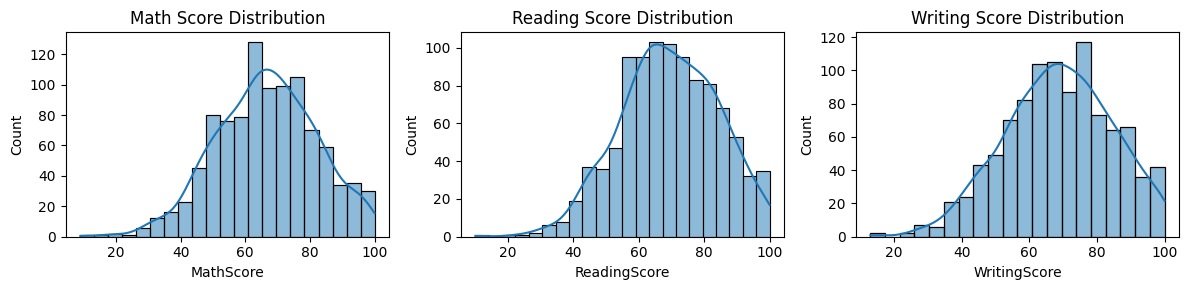

In [ ]:
# score distribution

# plotting subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

sns.histplot(data['MathScore'], ax=axes[0], kde=True)
axes[0].set_title('Math Score Distribution')

sns.histplot(data['ReadingScore'], ax=axes[1], kde=True)
axes[1].set_title('Reading Score Distribution')

sns.histplot(data['WritingScore'], ax=axes[2], kde=True)
axes[2].set_title('Writing Score Distribution')

plt.tight_layout()
plt.show()

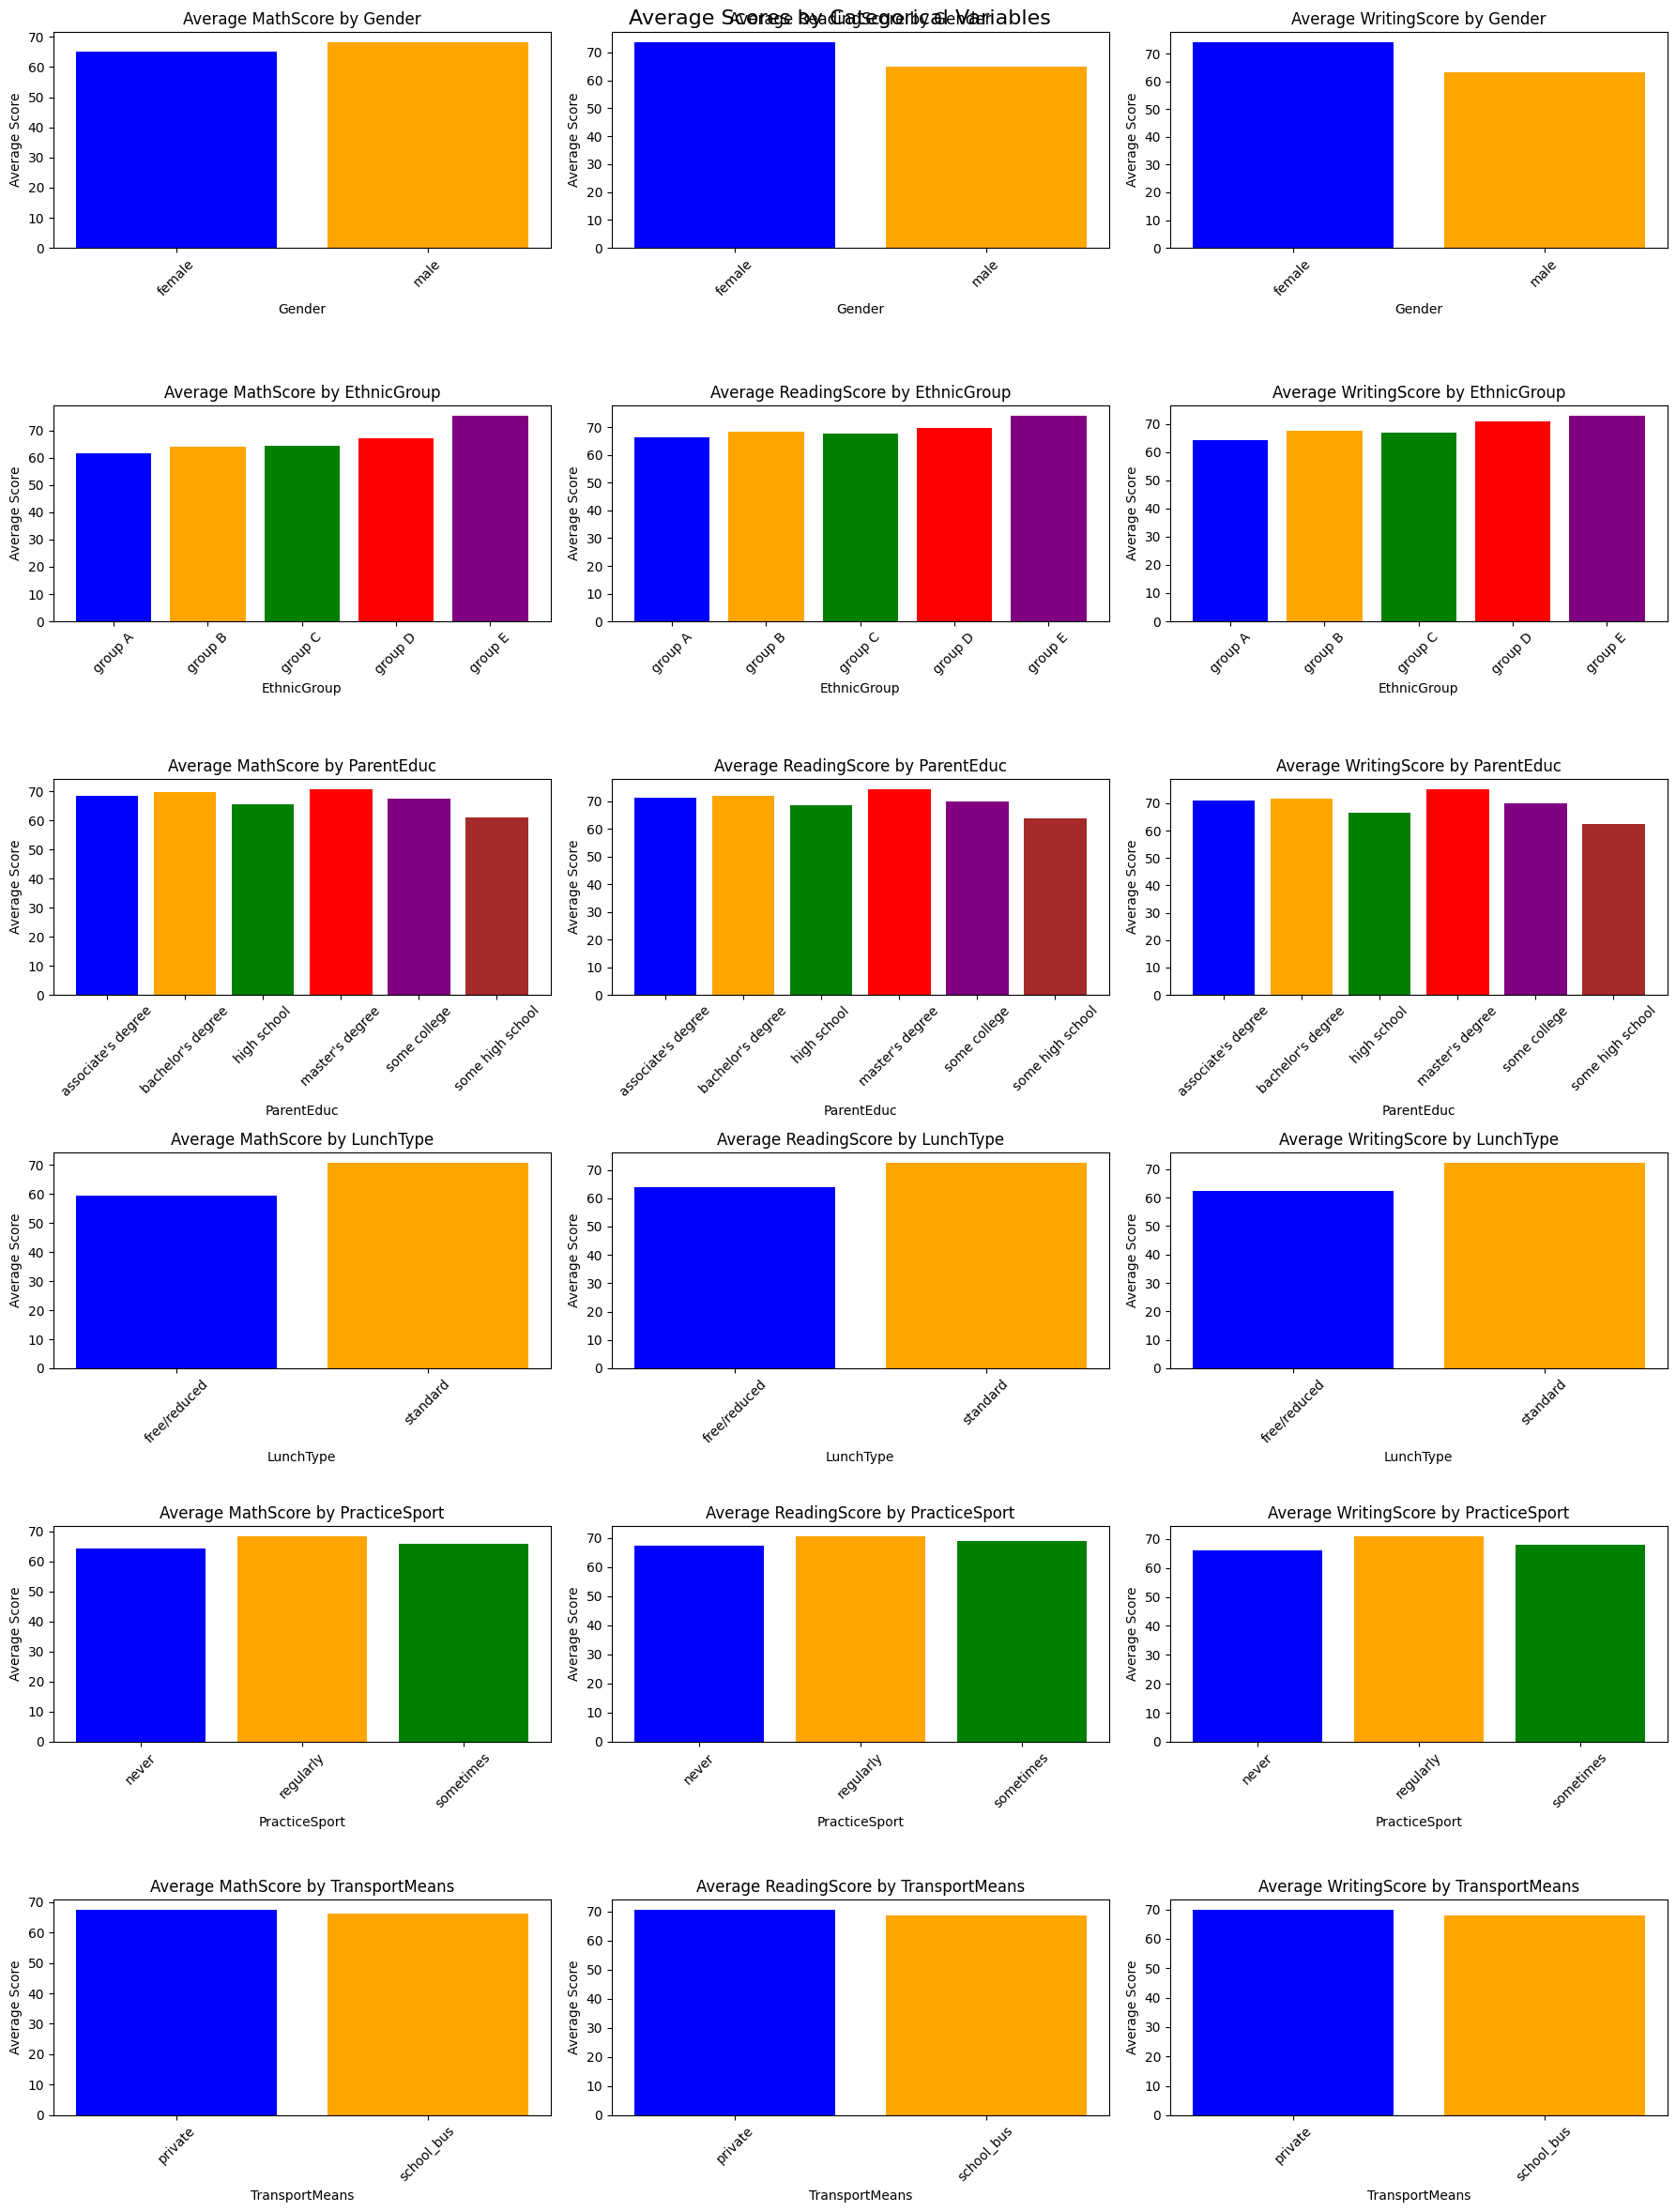

In [ ]:
# average score analysis
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'PracticeSport', 'TransportMeans']

# plotting subplots
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
fig.suptitle('Average Scores by Categorical Variables', fontsize=16)

# plotting bar plots
for i, column in enumerate(categorical_columns):
    for j, subject in enumerate(['MathScore', 'ReadingScore', 'WritingScore']):
        ax = axes[i, j]
        average_scores = data.groupby([column])[subject].mean()
        bars = ax.bar(average_scores.index, average_scores.values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

        ax.set_title(f'Average {subject} by {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Average Score')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

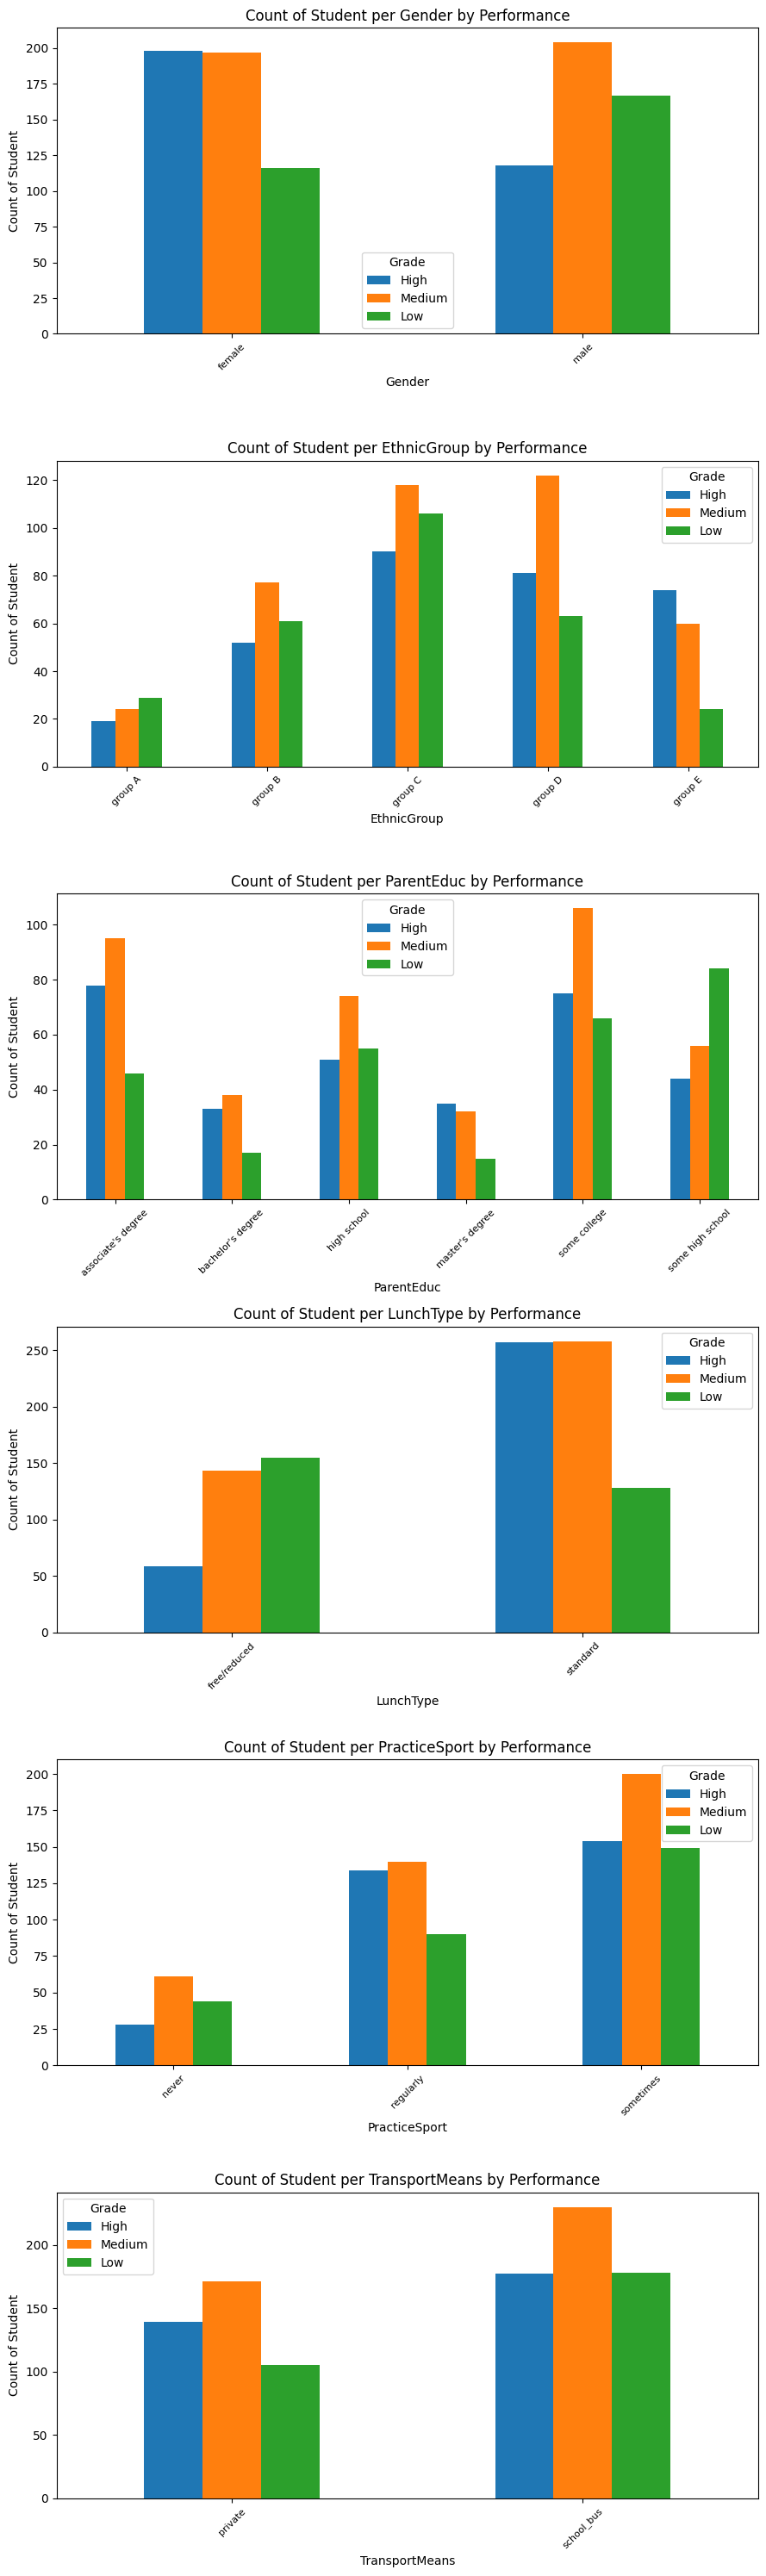

In [ ]:
# performance analysis
categorical_vars = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'PracticeSport', 'TransportMeans']

# plotting subplots
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(9, 5 * len(categorical_vars)))

# plotting bar plots
for i, var in enumerate(categorical_vars):
    average_scores = data.groupby([var, 'Grade'])['TotalScore'].count().unstack()
    average_scores = average_scores[['High', 'Medium', 'Low']]

    average_scores.plot(kind='bar', ax=axes[i], title=f'Count of Student per {var} by Performance', legend=True)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count of Student')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

**Insights**

1. Female students' performance is better than male students (more female students with high & medium performance)

2. Medium is the performance category with the highest number of students in every ethnic group, except Group E. Group E has more high performance students compared to medium and low performance students. This is why their average score is the highest compared to other ethnic group.

3. Parent's that have master degree tend to have children that performs better compared to the other educational level. From the graphic we can see that the gap between the number of high performance and medium performance students will be smaller as the parents' education level increases. While parents that attend some high school even have children that performs poorly.

4. High and medium performed students most likely had a standard type lunch.

5. PracticeSport and TransportMeans does not really affecting student's performance. From the graphic we can see that the PracticeSport and TransportMeans bars have a pretty similar form with each other.




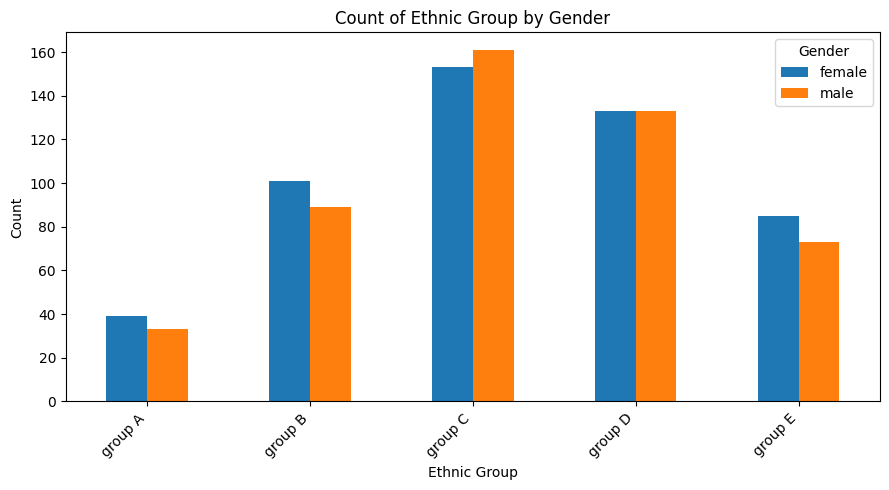

In [ ]:
# gender analysis by enthnic group
ethnic_gender_counts = data.groupby(['EthnicGroup', 'Gender'])['Gender'].count().unstack()

ax = ethnic_gender_counts.plot(kind='bar', figsize=(9, 5))

plt.title('Count of Ethnic Group by Gender')
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

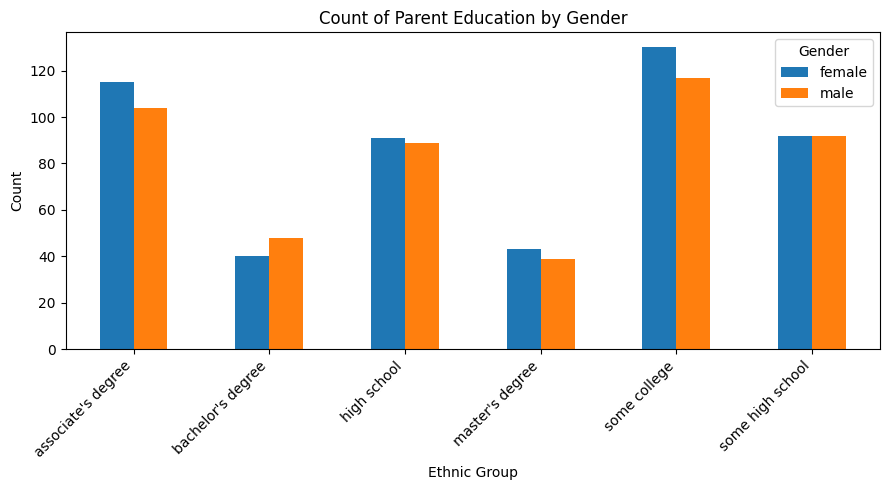

In [ ]:
# gender analysis by parent education
ethnic_gender_counts = data.groupby(['ParentEduc', 'Gender'])['Gender'].count().unstack()

ax = ethnic_gender_counts.plot(kind='bar', figsize=(9, 5))

plt.title('Count of Parent Education by Gender')
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

**Insights**

1. Because the number female students is larger than male students, we can see that every ethnic group bar have the same pattern. But Group C, which is the ethnicity with the largest number of students, actually has slightly more male students than female students.

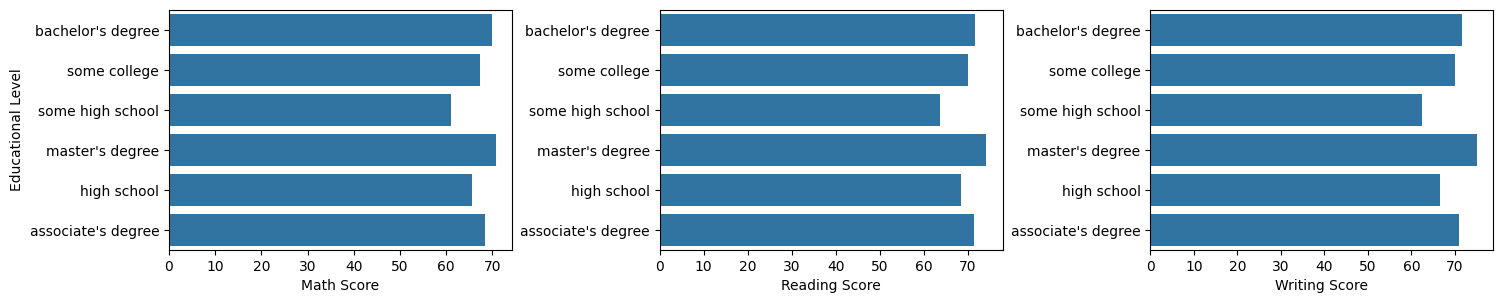

In [ ]:
# parent education average scores
fig,axs=plt.subplots(1,3,figsize=(15,3))

sns.barplot(ax=axs[0],y=data['ParentEduc'],x=data['MathScore'], errorbar=None)
axs[0].set_xlabel("Math Score")
axs[0].set_ylabel("Educational Level")

sns.barplot(ax=axs[1],y=data['ParentEduc'],x=data['ReadingScore'], errorbar=None)
axs[1].set_xlabel("Reading Score")
axs[1].set_ylabel("")

sns.barplot(ax=axs[2],y=data['ParentEduc'],x=data['WritingScore'], errorbar=None)
axs[2].set_xlabel("Writing Score")
axs[2].set_ylabel("")

plt.tight_layout(pad=0.6)
plt.show()

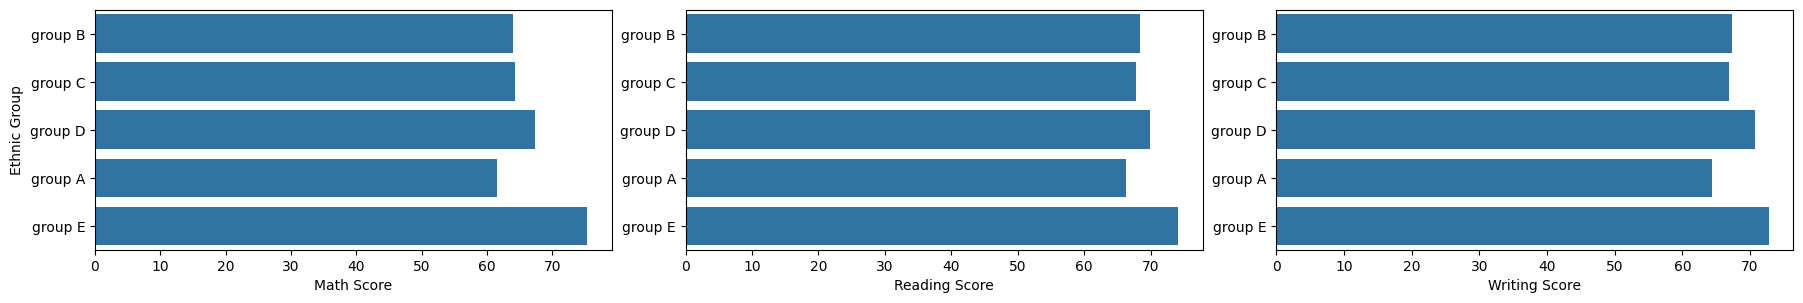

In [ ]:
# ethnic group average scores
fig,axs=plt.subplots(1,3,figsize=(18,3))

sns.barplot(ax=axs[0],y=data['EthnicGroup'],x=data['MathScore'], errorbar=None)
axs[0].set_xlabel("Math Score")
axs[0].set_ylabel("Ethnic Group")

sns.barplot(ax=axs[1],y=data['EthnicGroup'],x=data['ReadingScore'], errorbar=None)
axs[1].set_xlabel("Reading Score")
axs[1].set_ylabel("")

sns.barplot(ax=axs[2],y=data['EthnicGroup'],x=data['WritingScore'], errorbar=None)
axs[2].set_xlabel("Writing Score")
axs[2].set_ylabel("")

plt.tight_layout(pad=0.6)
plt.show()

In [ ]:
# correlation between mathscore, readingscore, and writingscore

correlation_matrix = data[['MathScore', 'ReadingScore', 'WritingScore']].corr()
print(correlation_matrix)

              MathScore  ReadingScore  WritingScore
MathScore      1.000000      0.825516      0.813622
ReadingScore   0.825516      1.000000      0.952856
WritingScore   0.813622      0.952856      1.000000


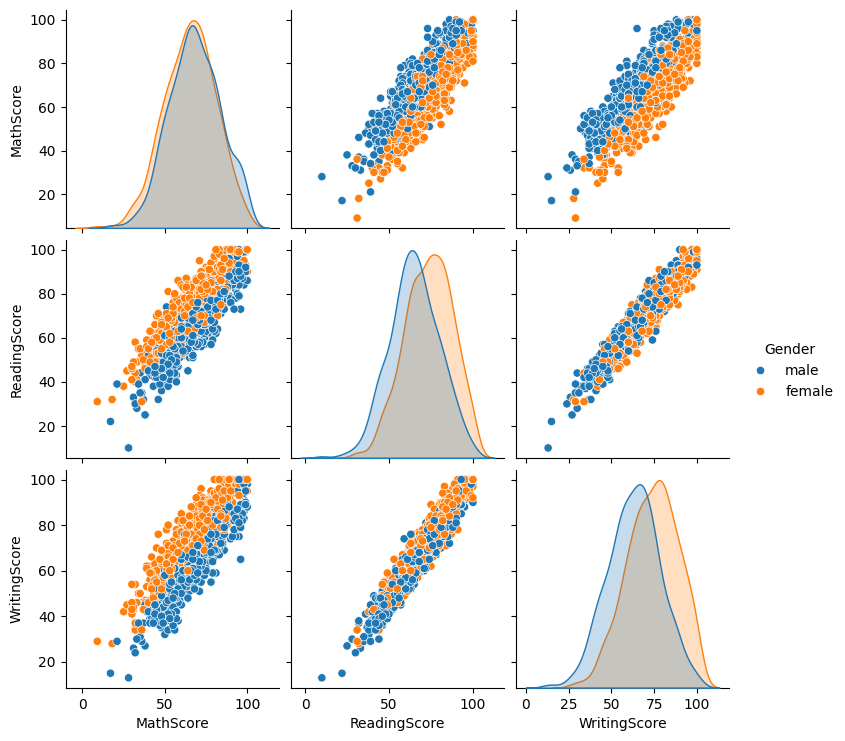

In [ ]:
# visualized correlation of math, reading and writing score by gender

sns.pairplot(data[['Gender', 'MathScore', 'ReadingScore', 'WritingScore',]], hue = 'Gender')
plt.show()

**Insights**

1. There is a strong positive correlation between all three scores (MathScore, ReadingScore, and WritingScore), with the strongest correlation
between Reading Score and Writing Score.
2. Male students may have a better score in math than female students (proved in average score analysis)